---
title: Motonic Networks Showcase
subtitle: Fitting shapes using NIGnets powered by Monotonic Networks
date: 2025-02-26
---

We now fit Injective Networks powered by Monotonic Networks to some target shapes to get a sense of
their representation power and shortcomings.

In [1]:
# Basic imports
import torch
from torch import nn
import geosimilarity as gs
from NIGnets import NIGnet
from NIGnets.monotonic_nets import SmoothMinMaxNet

from assets.utils import automate_training, plot_curves

# Intersection Possible
We now fit Injective Networks to target curves when there are no additional constraints on the
network weight matrices and therefore, non-invertibility of weight matrices is possible during
optimization.

## Circle and Square

Training Circle Net:
Epoch: [   1/1000]. Loss:    1.096553
Epoch: [ 200/1000]. Loss:    0.000002
Epoch: [ 400/1000]. Loss:    0.000000
Epoch: [ 600/1000]. Loss:    0.000000
Epoch: [ 800/1000]. Loss:    0.000002
Epoch: [1000/1000]. Loss:    0.000000
Training Square Net:
Epoch: [   1/1000]. Loss:    2.049936
Epoch: [ 200/1000]. Loss:    0.006946
Epoch: [ 400/1000]. Loss:    0.004896
Epoch: [ 600/1000]. Loss:    0.004664
Epoch: [ 800/1000]. Loss:    0.004571
Epoch: [1000/1000]. Loss:    0.004516


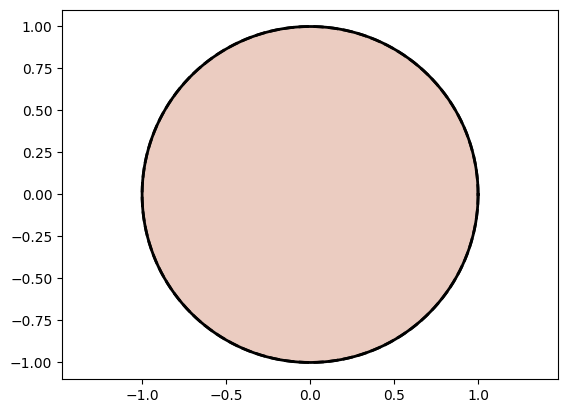

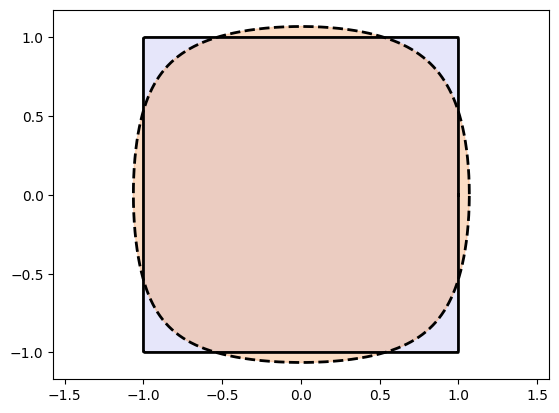

In [6]:
from assets.shapes import circle, square

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt_circle = circle(num_pts)
Xt_square = square(num_pts)

# Initialize networks to learn the target shapes and train
monotonic_net = SmoothMinMaxNet(input_dim = 1, n_groups = 3, nodes_per_group = 3)
circle_net = NIGnet(layer_count = 3, monotonic_net = monotonic_net)
square_net = NIGnet(layer_count = 3, monotonic_net = monotonic_net)

print('Training Circle Net:')
automate_training(
    model = circle_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt_circle,
    learning_rate = 0.1, epochs = 1000, print_cost_every = 200
)
print('Training Square Net:')
automate_training(
    model = square_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt_square,
    learning_rate = 0.1, epochs = 1000, print_cost_every = 200
)

# Get final curve represented by the networks
Xc_circle = circle_net(t)
Xc_square = square_net(t)

# Plot the curves
plot_curves(Xc_circle, Xt_circle)
plot_curves(Xc_square, Xt_square)

## Stanford Bunny

Epoch: [    1/10000]. Loss:    1.100082
Epoch: [ 2000/10000]. Loss:    0.001040
Epoch: [ 4000/10000]. Loss:    0.000453
Epoch: [ 6000/10000]. Loss:    0.000320
Epoch: [ 8000/10000]. Loss:    0.000288
Epoch: [10000/10000]. Loss:    0.000243


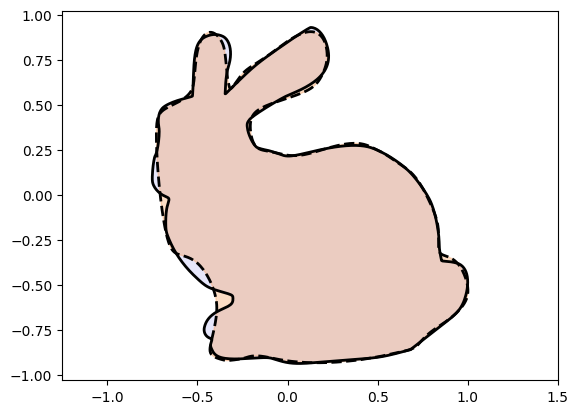

In [9]:
from assets.shapes import stanford_bunny

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt_bunny = stanford_bunny(num_pts)

monotonic_net = SmoothMinMaxNet(input_dim = 1, n_groups = 6, nodes_per_group = 6)
bunny_net = NIGnet(layer_count = 5, monotonic_net = monotonic_net)

automate_training(
    model = bunny_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt_bunny,
    learning_rate = 0.1, epochs = 10000, print_cost_every = 2000
)

Xc_bunny = bunny_net(t)
plot_curves(Xc_bunny, Xt_bunny)

# Intersection Impossible
We now fit Injective Networks to target curves when we first perform a matrix exponential of the
weight matrices and then use them for the linear transformations. Therefore, non-invertibility of
weight matrices is impossible during optimization.

## Circle and Square

Training Circle Net:
Epoch: [   1/1000]. Loss:    1.228657
Epoch: [ 200/1000]. Loss:    0.000054
Epoch: [ 400/1000]. Loss:    0.000022
Epoch: [ 600/1000]. Loss:    0.000012
Epoch: [ 800/1000]. Loss:    0.000008
Epoch: [1000/1000]. Loss:    0.000006
Training Square Net:
Epoch: [   1/1000]. Loss:    0.644530
Epoch: [ 200/1000]. Loss:    0.004742
Epoch: [ 400/1000]. Loss:    0.004563
Epoch: [ 600/1000]. Loss:    0.004495
Epoch: [ 800/1000]. Loss:    0.004458
Epoch: [1000/1000]. Loss:    0.004434


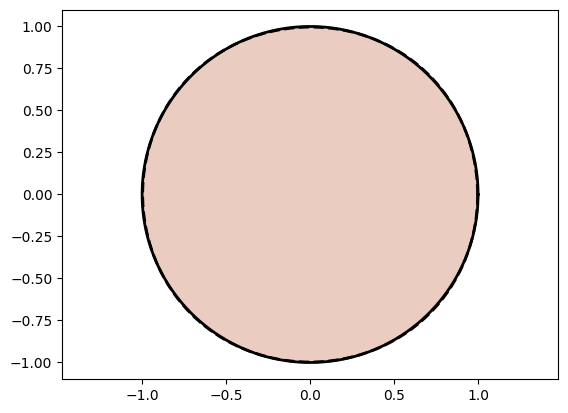

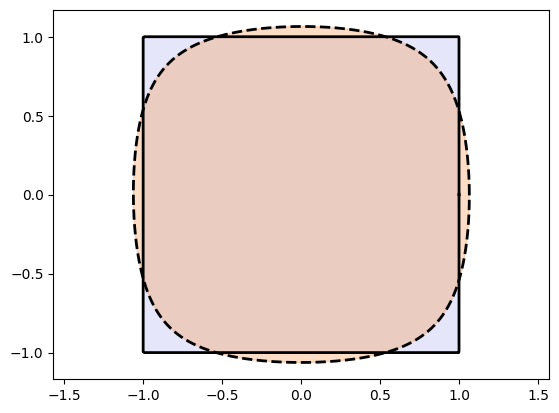

In [10]:
from assets.shapes import circle, square

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt_circle = circle(num_pts)
Xt_square = square(num_pts)

# Initialize networks to learn the target shapes and train
monotonic_net = SmoothMinMaxNet(input_dim = 1, n_groups = 3, nodes_per_group = 3)
circle_net = NIGnet(layer_count = 3, monotonic_net = monotonic_net, intersection = 'impossible')
square_net = NIGnet(layer_count = 3, monotonic_net = monotonic_net, intersection = 'impossible')

print('Training Circle Net:')
automate_training(
    model = circle_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt_circle,
    learning_rate = 0.1, epochs = 1000, print_cost_every = 200
)
print('Training Square Net:')
automate_training(
    model = square_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt_square,
    learning_rate = 0.1, epochs = 1000, print_cost_every = 200
)

# Get final curve represented by the networks
Xc_circle = circle_net(t)
Xc_square = square_net(t)

# Plot the curves
plot_curves(Xc_circle, Xt_circle)
plot_curves(Xc_square, Xt_square)

## Stanford Bunny

Epoch: [    1/10000]. Loss:    3.349069
Epoch: [ 2000/10000]. Loss:    0.042657
Epoch: [ 4000/10000]. Loss:    0.004270
Epoch: [ 6000/10000]. Loss:    0.003393
Epoch: [ 8000/10000]. Loss:    0.003189
Epoch: [10000/10000]. Loss:    0.003115


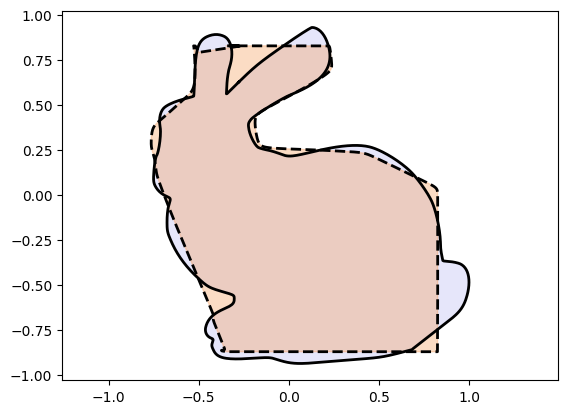

In [38]:
from assets.shapes import stanford_bunny

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt_bunny = stanford_bunny(num_pts)

monotonic_net = SmoothMinMaxNet(input_dim = 1, n_groups = 6, nodes_per_group = 6)
bunny_net = NIGnet(layer_count = 5, monotonic_net = monotonic_net, intersection = 'impossible')

automate_training(
    model = bunny_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt_bunny,
    learning_rate = 0.1, epochs = 10000, print_cost_every = 2000
)

Xc_bunny = bunny_net(t)
plot_curves(Xc_bunny, Xt_bunny)